<a href="https://colab.research.google.com/github/sabahoth01/Cancer-detection-classifiation-using-CNN/blob/main/Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download latest version
path = kagglehub.dataset_download("mysarahmadbhat/lung-cancer")

print("Path to dataset files:", path)
print('Data source import complete.')

Path to dataset files: /root/.cache/kagglehub/datasets/mysarahmadbhat/lung-cancer/versions/1
Data source import complete.


In [3]:

os.makedirs('/content/dataset', exist_ok=True)

# Define the source and destination paths
source_path = '/root/.cache/kagglehub/datasets/mysarahmadbhat/lung-cancer/versions/1'
destination_path = '/content/dataset'

# Copy the dataset files to the /content/data directory
!cp -r "{source_path}/." "{destination_path}/"

# Verify the files have been copied
print("Files in /content/dataset:")
!ls /content/dataset

Files in /content/dataset:
'survey lung cancer.csv'


# **EDA**

In [4]:
data = pd.read_csv('/content/dataset/survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
data.shape

(309, 16)

In [6]:
data.duplicated().sum()

33

In [7]:
data.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [9]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.

Also let's make every other attributes as YES=1 & NO=0, and delete all duplicated values

**Note: Male=1 & Female=0. Also for other variables, YES=1 & NO=0**

In [10]:
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Print the actual column names in the DataFrame for debugging
print("Actual columns in the DataFrame:", data.columns.tolist())

Actual columns in the DataFrame: ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


In [11]:
#Removing duplicates
data = data.drop_duplicates()

# Convert to numerical values categorical values
le = preprocessing.LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'GENDER', 'LUNG_CANCER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

# Apply LabelEncoder to each column
for column in columns_to_encode:
    # Check if the column exists in the DataFrame
    if column in data.columns:
        # Fit and transform the column
        data[column] = le.fit_transform(data[column])
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame. Skipping.")

In [12]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [13]:
data.groupby('LUNG_CANCER').mean()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
LUNG_CANCER,,,,,,,,,,,,,,,
0,0.447368,60.684211,0.50000,0.342105,0.315789,0.263158,0.342105,0.473684,0.131579,0.236842,0.184211,0.263158,0.552632,0.131579,0.315789
1,0.525210,63.264706,0.55042,0.613445,0.525210,0.546218,0.550420,0.693277,0.613445,0.596639,0.609244,0.626050,0.642857,0.521008,0.596639


On average, more than half of men in this dataset aged 63 years, presenting in more than the majority of cases the signs of each column (yellowed fingers, cough, etc...) are the most likely to be affected by lung cancer.

In [14]:
#Let's check the distributaion of Target variable.
data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


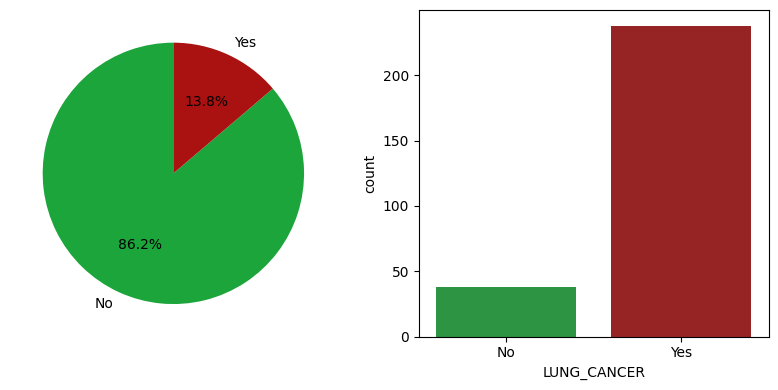

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Pie Chart
lung_cancer_counts = data['LUNG_CANCER'].value_counts()
axes[0].pie(lung_cancer_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#1CA53B', '#AA1111'], startangle=90)

# Subplot 2: Countplot
sns.countplot(x='LUNG_CANCER', data=data, ax=axes[1], palette=['#1CA53B', '#AA1111'])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()

**Imbalanced data!**

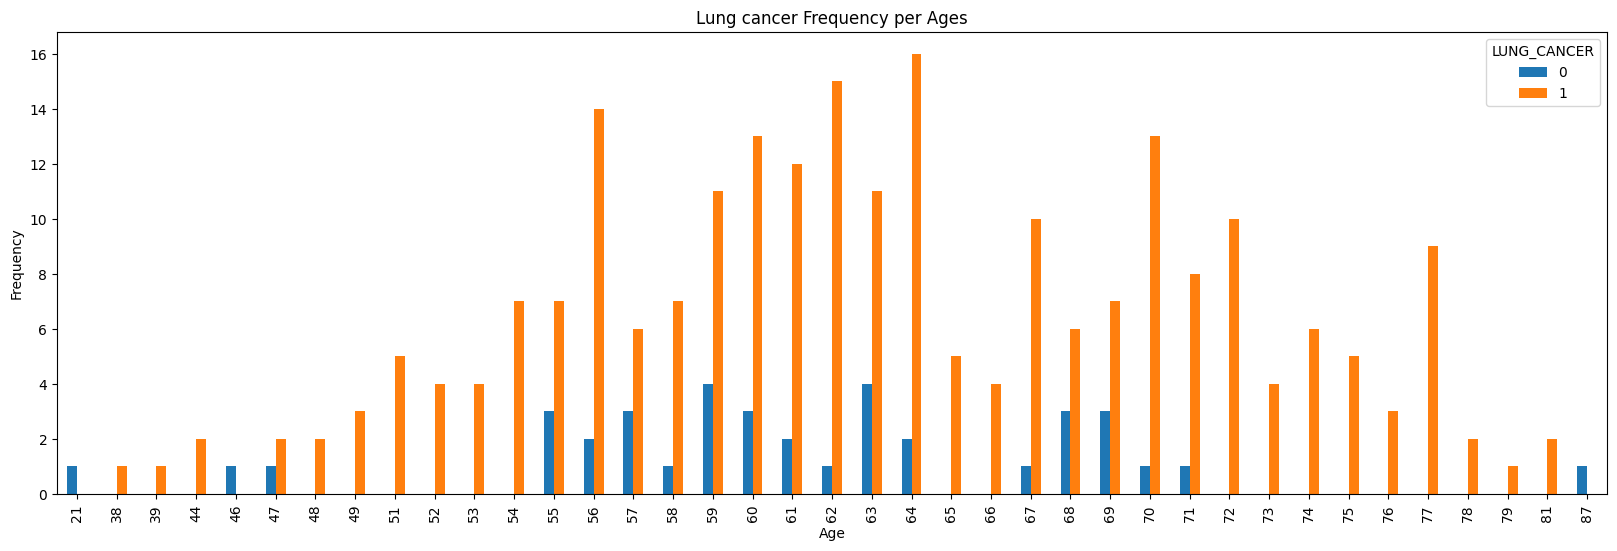

In [16]:
pd.crosstab(data.AGE,data.LUNG_CANCER).plot(kind="bar", figsize=(20, 6))
plt.title('Lung cancer Frequency per Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

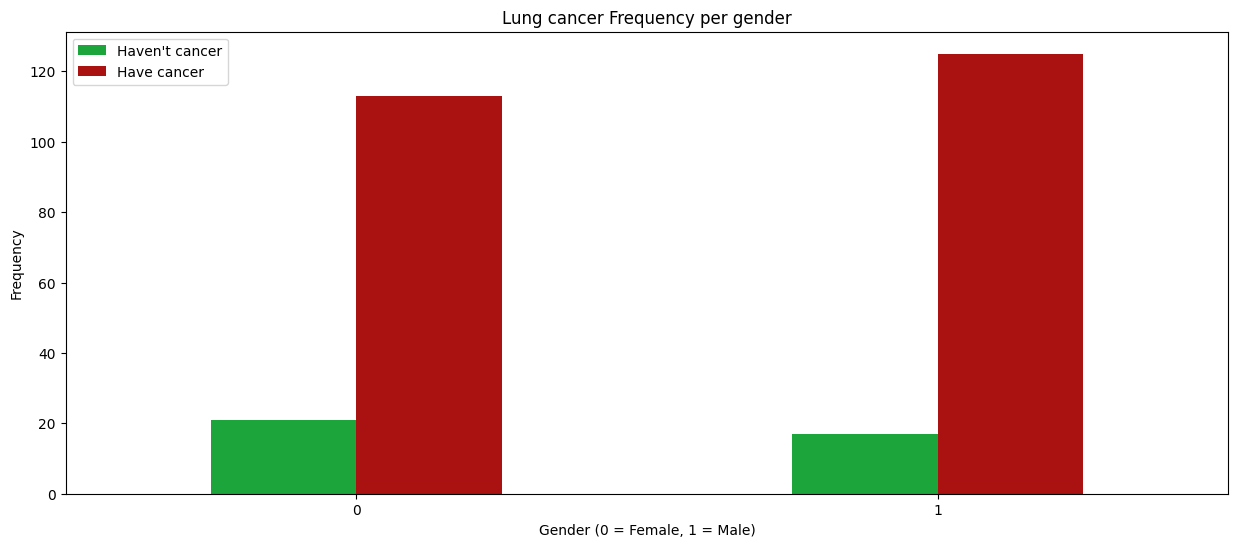

In [17]:
pd.crosstab(data.GENDER,data.LUNG_CANCER).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Lung cancer Frequency per gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't cancer", "Have cancer"])
plt.ylabel('Frequency')
plt.show()

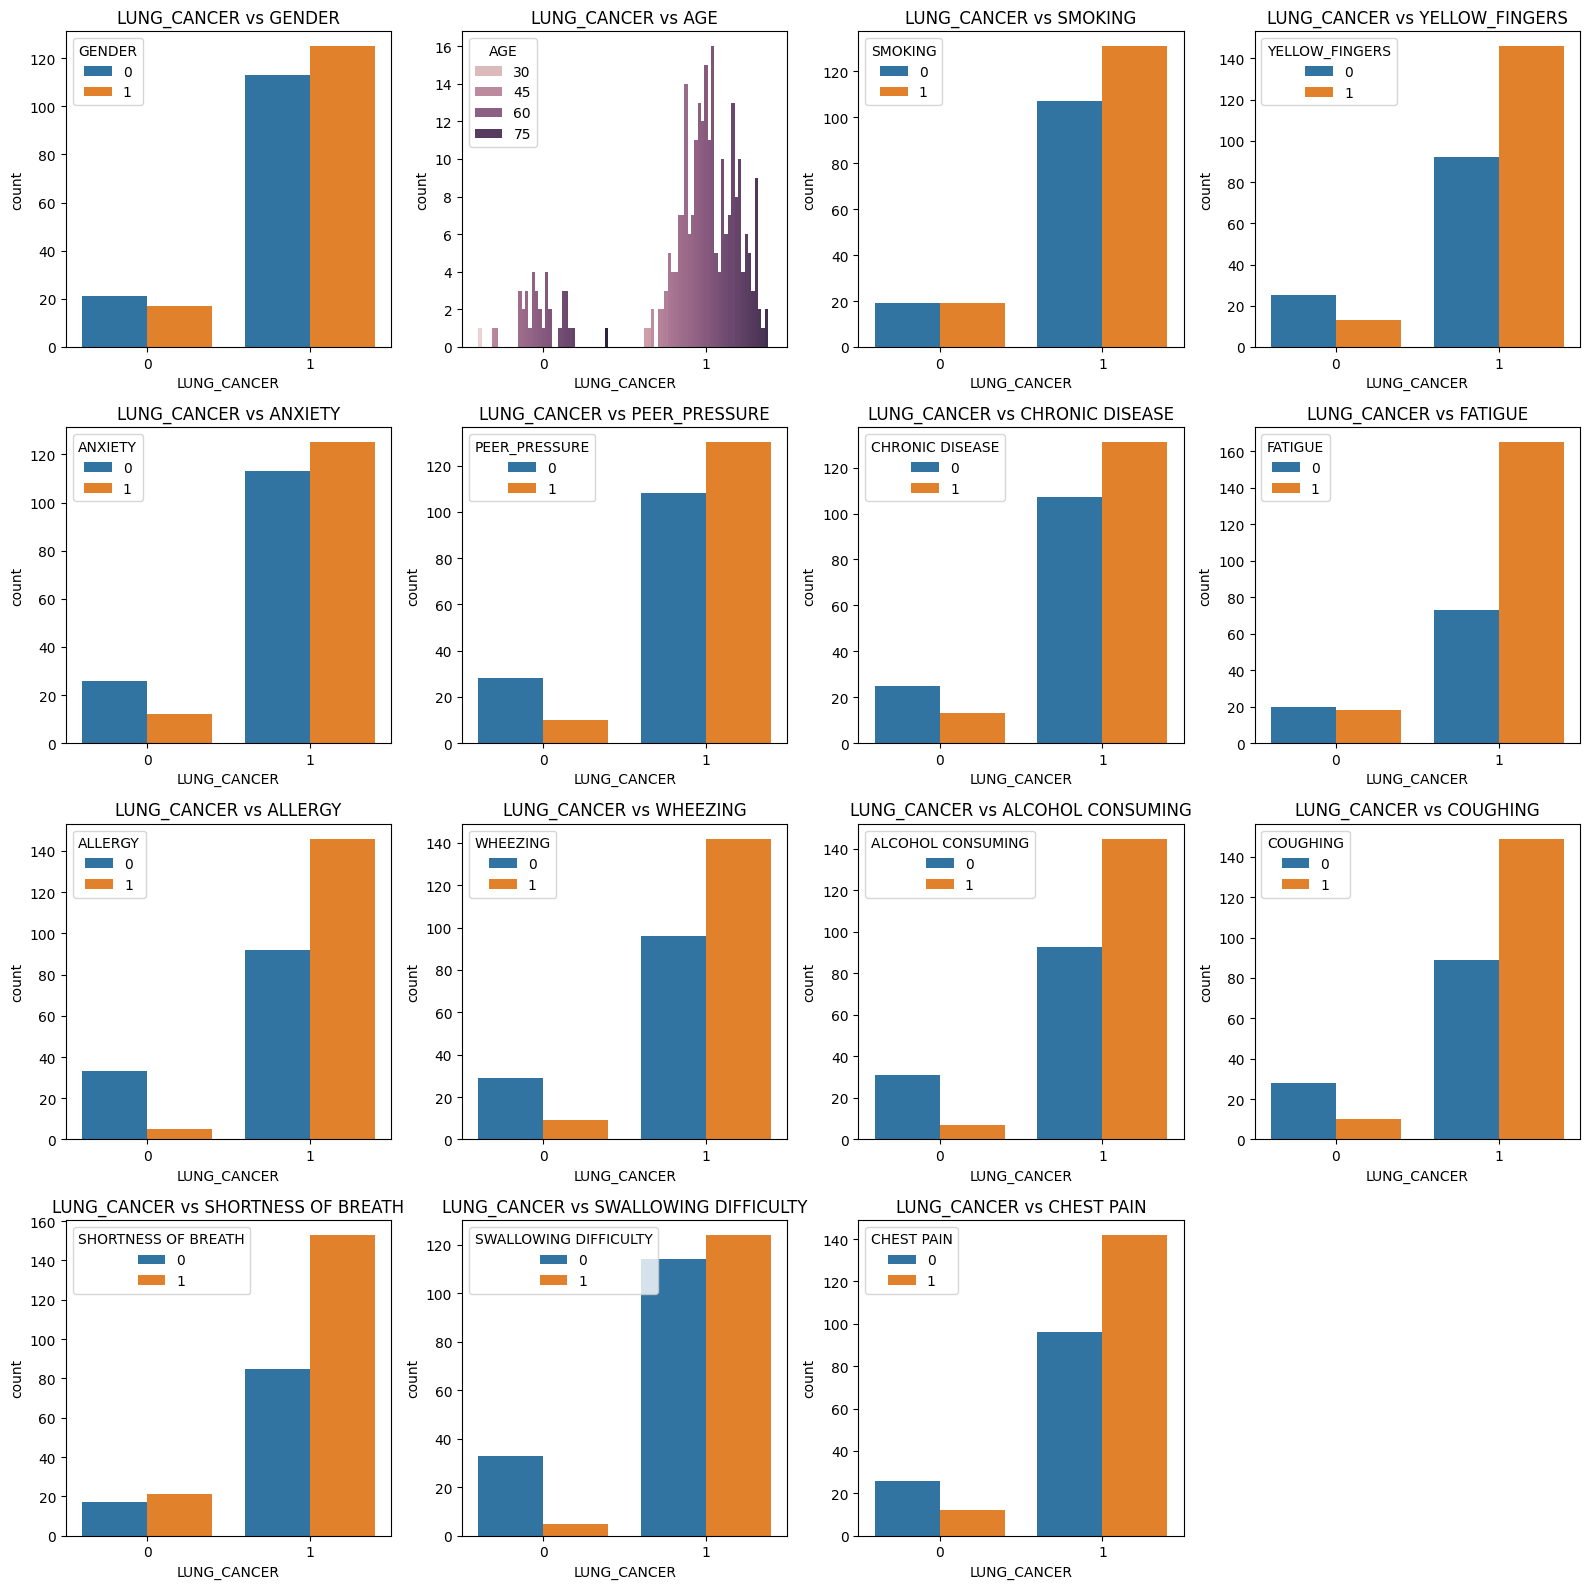

In [18]:
# List of columns to plot against 'LUNG_CANCER'
columns_to_plot = [
    'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]


fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()

# Plot countplots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x='LUNG_CANCER', hue=column, data=data, ax=axes[i])
    axes[i].set_title(f'LUNG_CANCER vs {column}')

# Hide unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

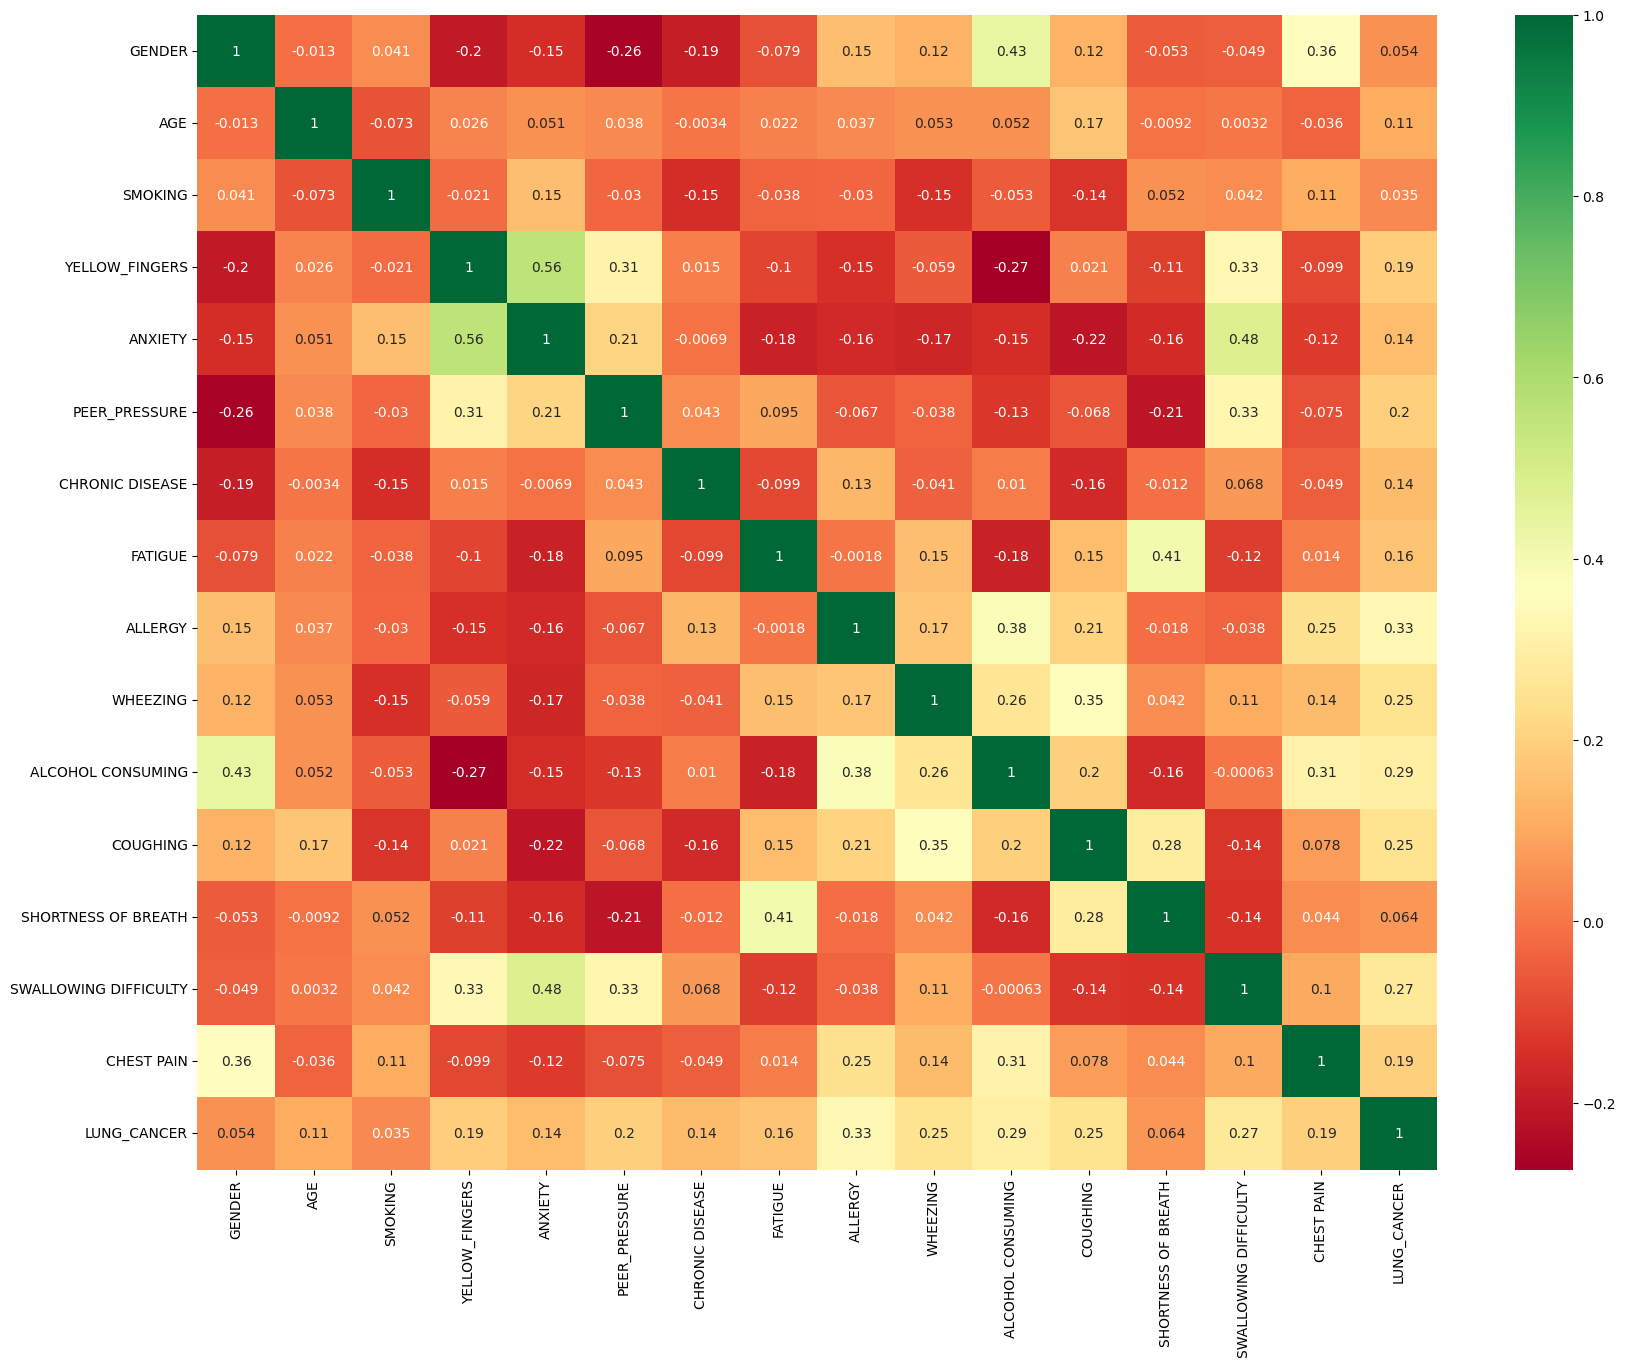

In [19]:
#Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(20, 15)
plt.show()

From the visualizations and correlation matrix, it is clear that in the given dataset, the features GENDER(0.054), SMOKING(0.035) and SHORTNESS OF BREATH(0.064) don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.

In [20]:
data_new=data.drop(columns=['GENDER', 'SMOKING', 'SHORTNESS OF BREATH'])
data_new

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,1,0,0,1,0,1,1,1,1,1,1
1,74,0,0,0,1,1,1,0,0,0,1,1,1
2,59,0,0,1,0,1,0,1,0,1,0,1,0
3,63,1,1,0,0,0,0,0,1,0,1,1,0
4,63,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,1,1,0,0,1,1,0,1,1,0,1
280,59,0,0,0,1,1,1,0,0,0,0,0,0
281,55,0,0,0,0,1,1,0,0,0,0,1,0
282,46,1,1,0,0,0,0,0,0,0,1,1,0


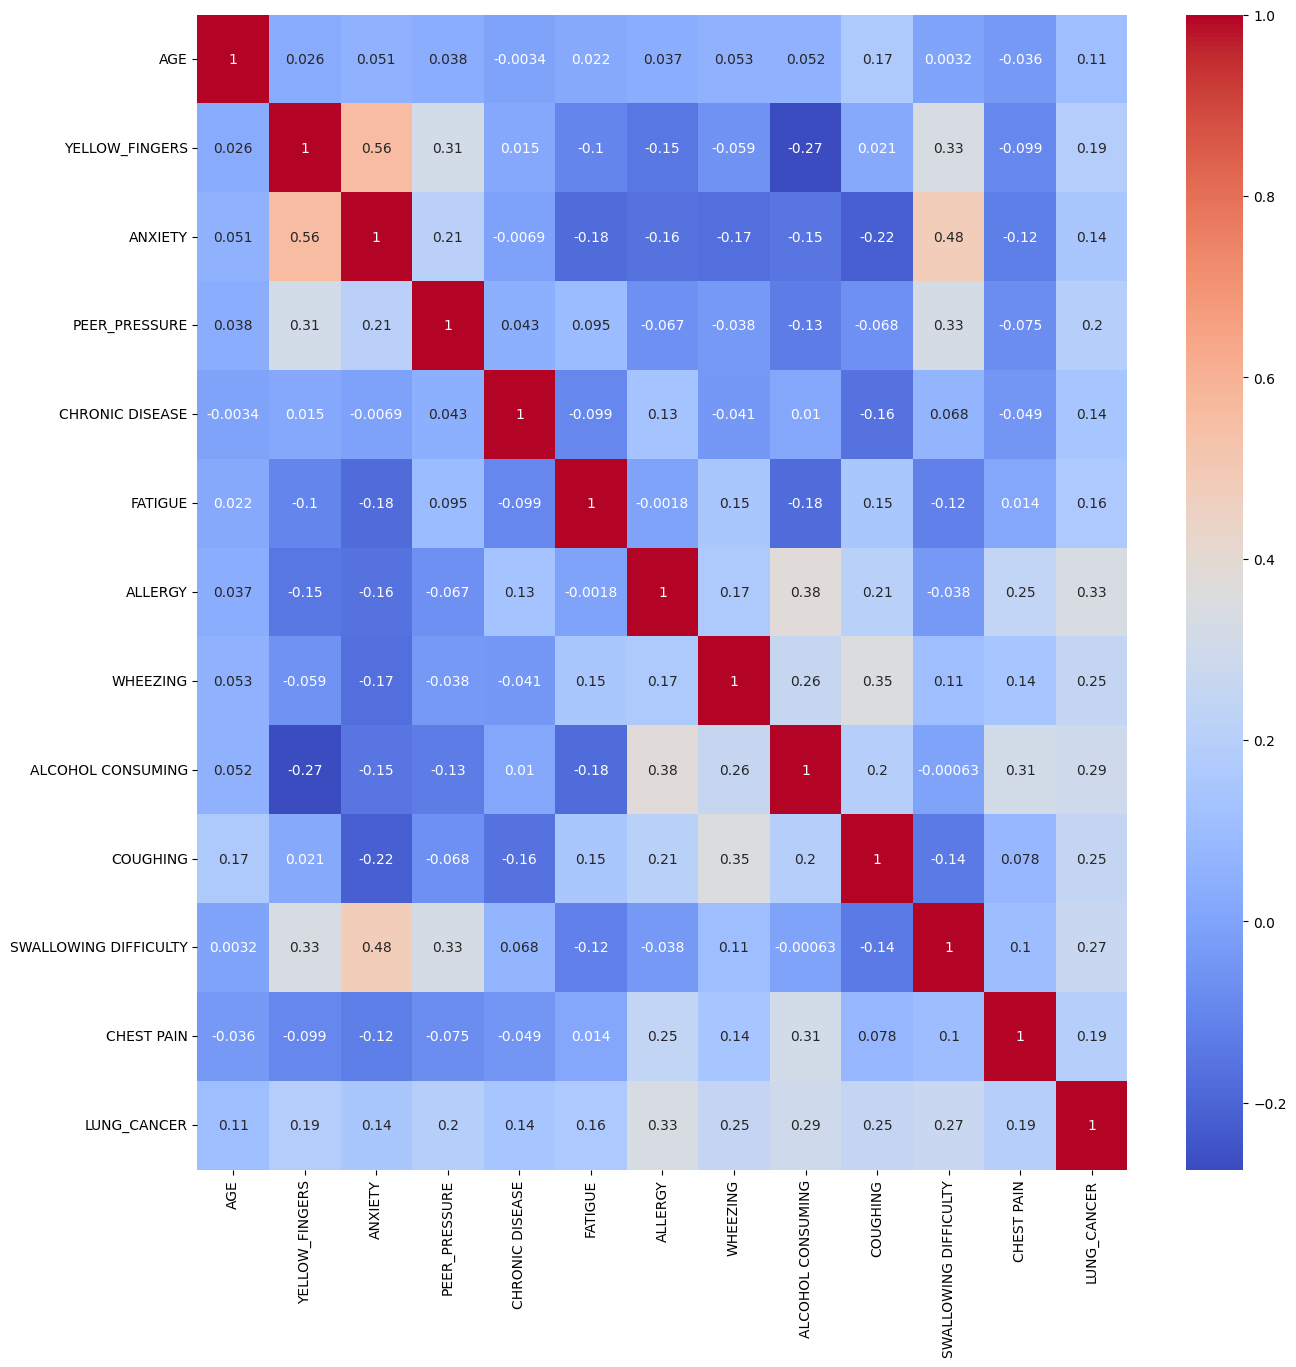

In [21]:
#Correlation
sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

# **Feature Engineering**

Aready began it when we transform all data to numerical(encoder).

The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 51-56%. So, lets create a new feature combining them by using **interaction term** to captures the combined effect of both features...

In [22]:
# Create a new feature by multiplying ANXIETY and YELLOW_FINGERS
data_new['ANXIETY_YELLOW_FINGERS_INTERACTION'] = data_new['ANXIETY'] * data['YELLOW_FINGERS']
data_new

,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXIETY_YELLOW_FINGERS_INTERACTION
0,69,1,1,0,0,1,0,1,1,1,1,1,1,1
1,74,0,0,0,1,1,1,0,0,0,1,1,1,0
2,59,0,0,1,0,1,0,1,0,1,0,1,0,0
3,63,1,1,0,0,0,0,0,1,0,1,1,0,1
4,63,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,1,1,0,0,1,1,0,1,1,0,1,1
280,59,0,0,0,1,1,1,0,0,0,0,0,0,0
281,55,0,0,0,0,1,1,0,0,0,0,1,0,0
282,46,1,1,0,0,0,0,0,0,0,1,1,0,1


# **Prediction**

In [23]:
#Splitting independent and dependent variables
X = data_new.drop('LUNG_CANCER', axis = 1)
y = data_new['LUNG_CANCER']

In [24]:
# Imbalance handling
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [25]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [26]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Multinomial Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'Multi-Layer Perceptron': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 9]
        }
    }
}

Tuning and evaluating Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.9439
Test Accuracy for Logistic Regression: 0.9748
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.98      0.97      0.97        59

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



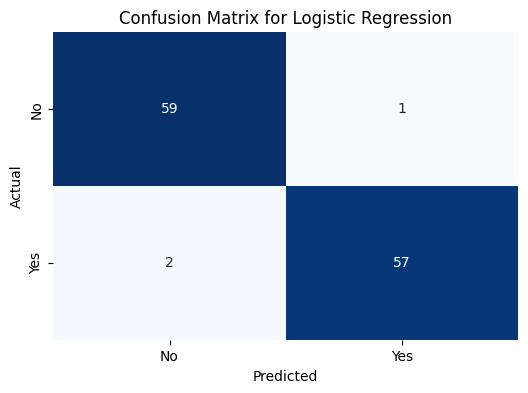



Tuning and evaluating Decision Tree...
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best Cross-Validation Score for Decision Tree: 0.9300
Test Accuracy for Decision Tree: 0.9328
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.95      0.92      0.93        59

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119



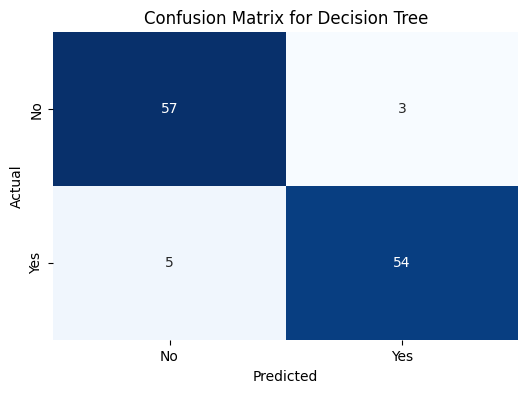



Tuning and evaluating K-Nearest Neighbors...
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score for K-Nearest Neighbors: 0.8964
Test Accuracy for K-Nearest Neighbors: 0.9580
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.97      0.95      0.96        59

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



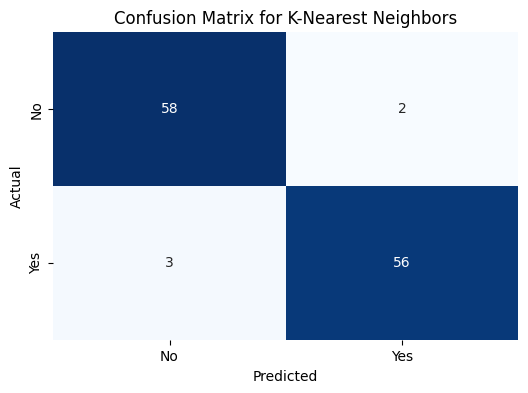



Tuning and evaluating Gaussian Naive Bayes...
Best Parameters for Gaussian Naive Bayes: {}
Best Cross-Validation Score for Gaussian Naive Bayes: 0.9188
Test Accuracy for Gaussian Naive Bayes: 0.9580
Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.92      1.00      0.96        59

    accuracy                           0.96       119
   macro avg       0.96      0.96      0.96       119
weighted avg       0.96      0.96      0.96       119



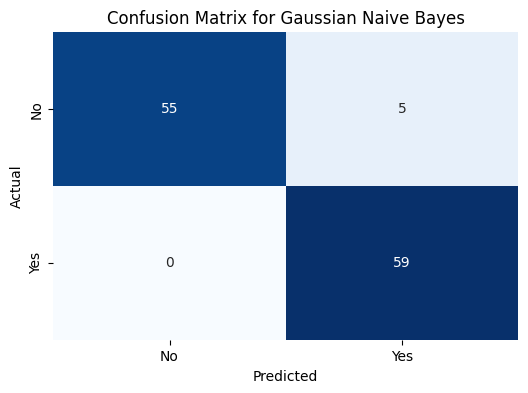



Tuning and evaluating Multinomial Naive Bayes...
Best Parameters for Multinomial Naive Bayes: {'alpha': 1}
Best Cross-Validation Score for Multinomial Naive Bayes: 0.9244
Test Accuracy for Multinomial Naive Bayes: 0.9748
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.95      1.00      0.98        59

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.98      0.97      0.97       119



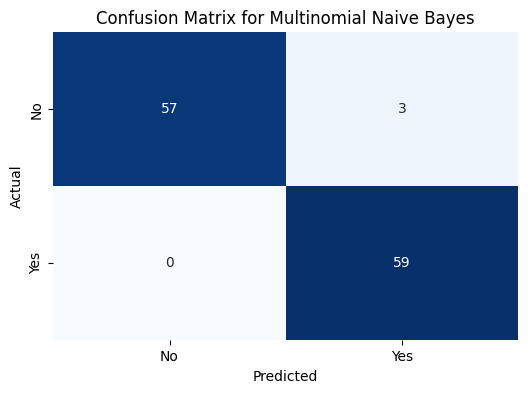



Tuning and evaluating Support Vector Classifier...
Best Parameters for Support Vector Classifier: {'C': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score for Support Vector Classifier: 0.9355
Test Accuracy for Support Vector Classifier: 0.9916
Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



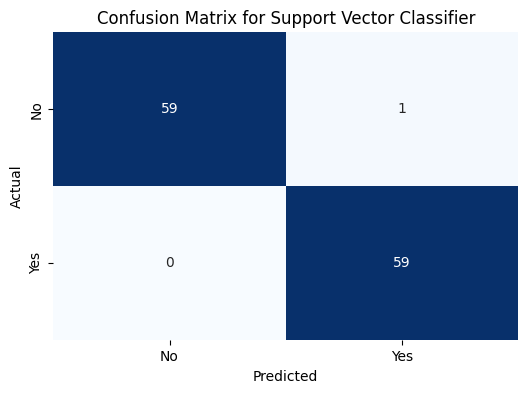



Tuning and evaluating Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Best Cross-Validation Score for Random Forest: 0.9467
Test Accuracy for Random Forest: 0.9916
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        59

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



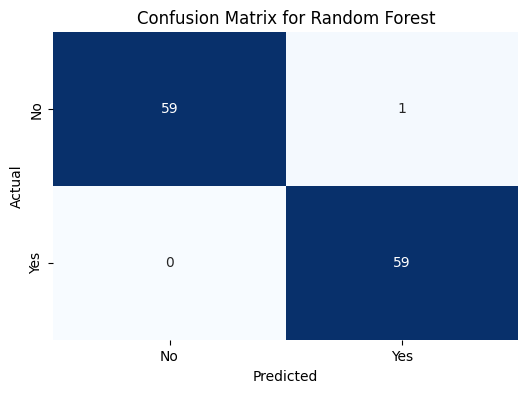



Tuning and evaluating Multi-Layer Perceptron...
Best Parameters for Multi-Layer Perceptron: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Best Cross-Validation Score for Multi-Layer Perceptron: 0.9327
Test Accuracy for Multi-Layer Perceptron: 0.9832
Classification Report for Multi-Layer Perceptron:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.97      1.00      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



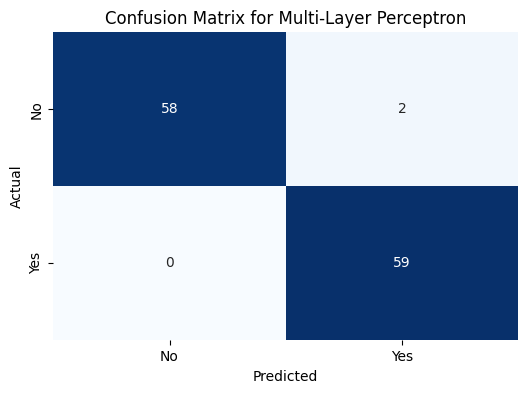



Tuning and evaluating Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Score for Gradient Boosting: 0.9355
Test Accuracy for Gradient Boosting: 0.9832
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.97      1.00      0.98        59

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



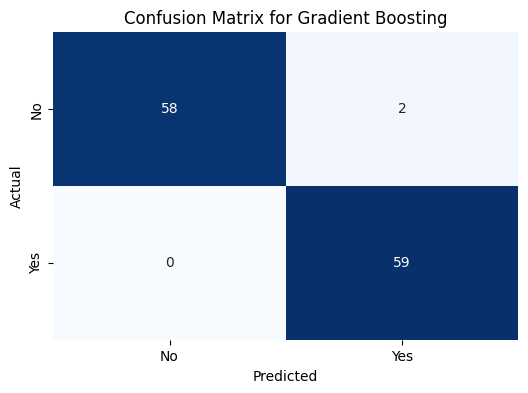

In [27]:
results = []

for model_name, config in models.items():
    print(f"Tuning and evaluating {model_name}...")

    # Define cross-validation strategy (stratified k-fold)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results.append({
        'Model': model_name,
        'Best Params': best_params,
        'Best Score': best_score,
        'Test Accuracy': accuracy
    })

    # Print results
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"Best Cross-Validation Score for {model_name}: {best_score:.4f}")
    print(f"Test Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n{report}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("\n" + "="*70 + "\n")


In [28]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Best Score,Test Accuracy
0,Logistic Regression,"{'C': 10, 'solver': 'liblinear'}",0.943897,0.974790
1,Decision Tree,"{'max_depth': None, 'min_samples_split': 10}",0.929969,0.932773
2,K-Nearest Neighbors,"{'n_neighbors': 3, 'weights': 'distance'}",0.896401,0.957983
3,Gaussian Naive Bayes,{},0.918779,0.957983
4,Multinomial Naive Bayes,{'alpha': 1},0.924413,0.974790
5,Support Vector Classifier,"{'C': 0.1, 'kernel': 'linear'}",0.935485,0.991597
6,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.946674,0.991597
7,Multi-Layer Perceptron,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.932668,0.983193
8,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.935524,0.983193


# **Prediction example**

In [29]:
# Save feature names during training
feature_names = X_train.columns.tolist()
print("Feature names used during training:", feature_names)

Feature names used during training: ['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANXIETY_YELLOW_FINGERS_INTERACTION']


In [30]:
# Find the model with the highest test accuracy
best_model_info = results_df.loc[results_df['Test Accuracy'].idxmax()]

# Extract the best model's name and parameters
best_model_name = best_model_info['Model']
best_model_params = best_model_info['Best Params']

print(f"The best model is {best_model_name} with test accuracy {best_model_info['Test Accuracy']:.4f}")
print(f"Best Parameters: {best_model_params}")

The best model is Support Vector Classifier with test accuracy 0.9916
Best Parameters: {'C': 0.1, 'kernel': 'linear'}


In [31]:
# Get the best model's configuration from the models dictionary
best_model_config = models[best_model_name]

# Initialize the model with the best parameters
best_model = best_model_config['model'].set_params(**best_model_params)

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Save the best model for future use
joblib.dump(best_model, 'best_lung_cancer_model.pkl')

['best_lung_cancer_model.pkl']

In [35]:
# Load the trained model
best_model = joblib.load('best_lung_cancer_model.pkl')

def validate_input(feature, value):
    """
    Validate user input based on feature type.
    """
    if feature == 'AGE':
        try:
            value = int(value)
            if not (1 <= value <= 100):
                raise ValueError("Age must be between 1 and 100.")
        except ValueError:
            raise ValueError("Age must be a valid number between 1 and 100.")
    else:
        if value not in ['0', '1']:
            raise ValueError(f"{feature} must be 0 or 1.")
    return float(value)

def predict_lung_cancer():
    # Define the feature names
    feature_names = ['AGE', 'YELLOW_FINGERS', 'ANXIETY',
                    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
                    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANXIETY_YELLOW_FINGERS_INTERACTION']

    # Take user input for each feature
    user_input = {}
    for feature in feature_names:
        while True:
            value = input(f"Enter value for {feature}: ").strip()
            if not value:
                print(f"{feature} is required. Please enter a value.")
                continue
            try:
                validated_value = validate_input(feature, value)
                user_input[feature] = [validated_value]
                break
            except ValueError as e:
                print(e)

    # Convert user input into a DataFrame
    input_df = pd.DataFrame(user_input)

    # Make a prediction
    prediction = best_model.predict(input_df)

    # Map prediction to a meaningful output
    if prediction[0] == 1:
        return "\n\t *** The patient is predicted to have lung cancer. ***"
    else:
        return "\n\t *** The patient is predicted to NOT have lung cancer. ***"

# Example usage
print(predict_lung_cancer())

Enter value for AGE: 50
Enter value for YELLOW_FINGERS: 1
Enter value for ANXIETY: 1
Enter value for PEER_PRESSURE: 0
Enter value for CHRONIC DISEASE: 0
Enter value for FATIGUE: 0
Enter value for ALLERGY: 0
Enter value for WHEEZING: 1
Enter value for ALCOHOL CONSUMING: 1
Enter value for COUGHING: 0
Enter value for SWALLOWING DIFFICULTY: 1
Enter value for CHEST PAIN: 1
Enter value for ANXIETY_YELLOW_FINGERS_INTERACTION: 1

	 *** The patient is predicted to have lung cancer. ***
